In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import numpyro

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.baseline import Baseline

numpyro.set_platform('cpu')
numpyro.set_host_device_count(4)

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, encoder_dict = data.build()

2023-03-07 17:15:08,019 - hb_mep.data_access.core - INFO - Reading data ....
2023-03-07 17:15:08,024 - hb_mep.data_access.core - INFO - Processing data ...
2023-03-07 17:15:08,064 - hb_mep.utils.utils - INFO - func:build took: 0.05 sec


#### Initialize model

In [5]:
model = Baseline(config)

#### Run MCMC inference

In [6]:
mcmc, posterior_samples = model.sample(df=df)

2023-03-07 17:15:08,509 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-03-07 17:15:08,510 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-07 17:15:08,510 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-03-07 17:15:08,511 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-03-07 17:15:08,512 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-03-07 17:15:08,564 - hb_mep.models.baseline - INFO - Running inference wit

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

2023-03-07 17:16:18,512 - hb_mep.utils.utils - INFO - func:sample took: 1 min and 10.01 sec


#### Diagnostics

In [7]:
mcmc.print_summary()


                                             mean       std    median      5.0%     95.0%     n_eff     r_hat
                                 a[0,0]      6.81      0.04      6.79      6.76      6.89    171.25      1.01
                                 a[1,0]      1.93      0.06      1.95      1.84      2.02    815.40      1.00
                                 a[2,0]      2.03      0.03      2.03      1.98      2.08    637.07      1.01
                                 a[3,0]      2.22      0.04      2.22      2.16      2.29    132.70      1.03
                                 a[4,0]      3.02      0.02      3.02      2.99      3.05    152.12      1.03
                         a_global_scale      1.39      0.99      1.16      0.10      2.81    484.22      1.01
                      a_level_mean[0,0]      5.78      1.85      6.56      2.12      7.95    672.65      1.00
                      a_level_mean[1,0]      1.96      0.82      1.93      0.47      3.10   6802.46      1.00
         

#### Plot fitted curves

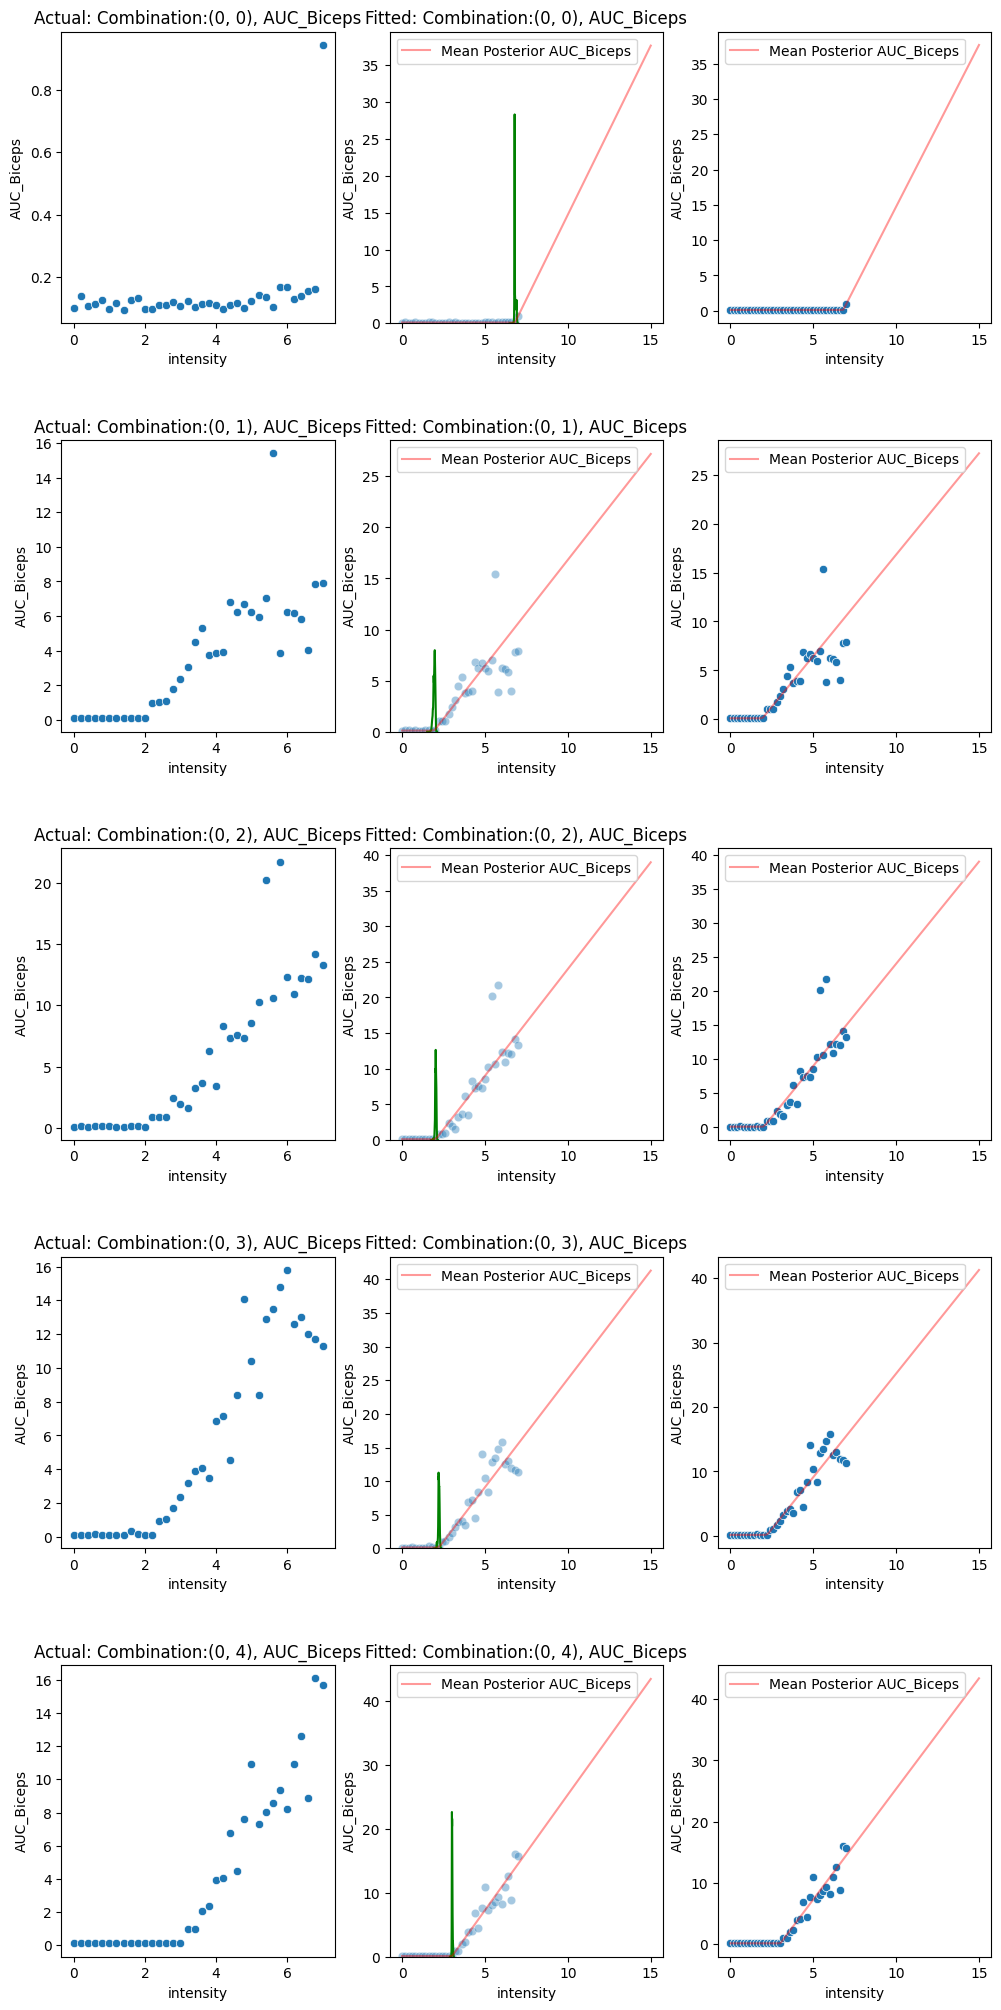

In [8]:
model.plot_fit(df=df, posterior_samples=posterior_samples);

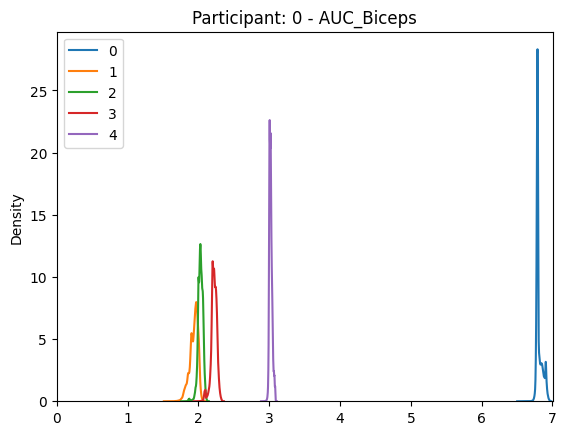

In [9]:
model.plot_kde(df=df, posterior_samples=posterior_samples);